In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [7]:
df = pd.read_csv('results.csv')
df[['sensors', 'logistic']]

,sensors,logistic
0,light,0.973346
1,light,0.929685
2,sound,0.869694
3,sound,0.549427
4,temp,0.856861
5,temp,0.521140
6,co2,0.875617
7,co2,0.535526


In [8]:
df['average'] = (df['logistic'] + df['rf'] + df['xgboost'] + df['svm_linear'] + df['svm_rbf']) / 5
df

,sensors,metrics,logistic,rf,xgboost,svm_linear,svm_rbf,average
0,light,accuracy,0.973346,0.995558,0.995558,0.973346,0.978282,0.983218
1,light,f1,0.929685,0.986839,0.986178,0.929685,0.944695,0.955416
2,sound,accuracy,0.869694,0.894867,0.895360,0.876111,0.888944,0.884995
3,sound,f1,0.549427,0.645913,0.650475,0.550353,0.628554,0.604944
4,temp,accuracy,0.856861,0.986673,0.985192,0.882527,0.954097,0.933070
5,temp,f1,0.521140,0.966473,0.962797,0.604032,0.871574,0.785203
6,co2,accuracy,0.875617,0.957058,0.959033,0.892399,0.915597,0.919941
7,co2,f1,0.535526,0.866498,0.872175,0.635709,0.738304,0.729642


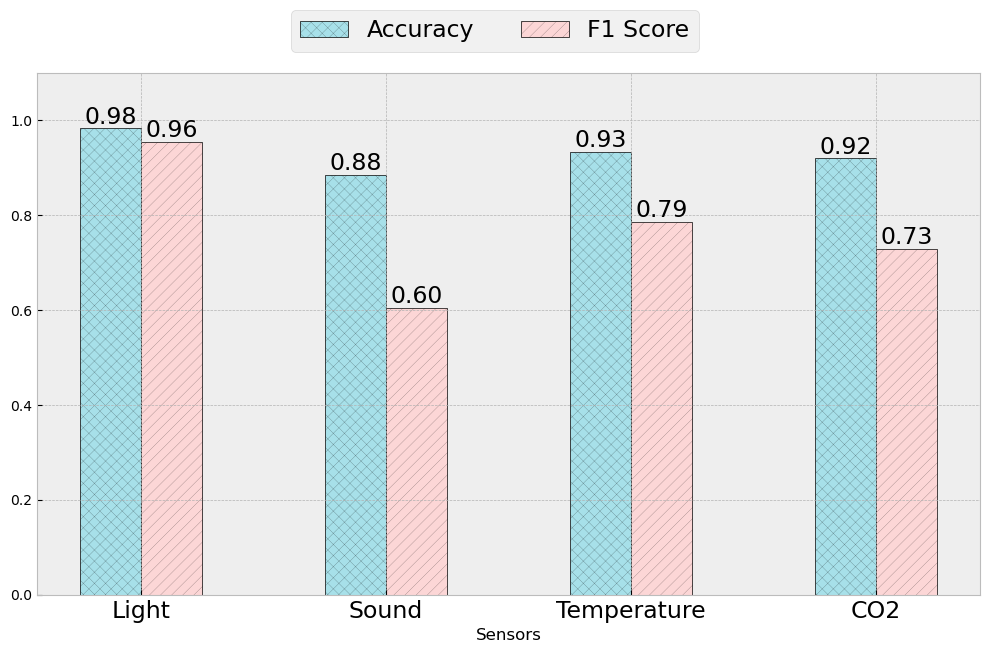

In [49]:
import matplotlib as mpl
plt.style.use('bmh')
mpl.rcParams['hatch.linewidth'] = 0.1
groups = ['Light', 'Sound', 'Temperature', 'CO2']

x = np.arange(len(groups))
bar1_values = df[df['metrics'] == 'accuracy']['average']
bar2_values = df[df['metrics'] == 'f1']['average']
bar1_hatches = ['xxx', '///']

width = 0.25

bar_col = ['#a7e0e9', '#fcd6d6']

fig, ax = plt.subplots(figsize=(10, 6))

bar1 = ax.bar(x - width/2, bar1_values, width, label='Accuracy', hatch=bar1_hatches[0], color=bar_col[0], edgecolor='black')
bar2 = ax.bar(x + width/2, bar2_values, width, label='F1 Score', hatch=bar1_hatches[1], color=bar_col[1], edgecolor='black')

for bar in bar1:
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), '{:.2f}'.format(bar.get_height()), ha='center', va='bottom'
            ,fontsize=17)
for bar in bar2: 
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), '{:.2f}'.format(bar.get_height()), ha='center', va='bottom',
            fontsize=17)

ax.set_xticks(x, groups, fontsize=17)
ax.set_xlabel('Sensors')
# ax.legend()
ax.set_ylim(0, 1.1)

fig.legend(loc='upper center', ncol=2, bbox_to_anchor=(0.5, 1.1), fontsize=17)

plt.tight_layout()
fig.savefig('img/results.png', dpi=300, bbox_inches='tight')


In [11]:
df_comb = pd.read_csv('results_comb.csv')
df_comb

,sensors,metrics,logistic,rf,xgboost,svm_linear,svm_rbf
0,light,f1,0.929685,0.986839,0.986178,0.929685,0.944695
1,light+sound,f1,0.941606,0.988246,0.985618,0.945588,0.967227
2,light+temp,f1,0.977749,0.996372,0.993055,0.980300,0.983106
3,light+co2,f1,0.956026,0.993056,0.990794,0.955106,0.975925


In [14]:
xticks = df_comb['sensors']
xticks

0          light
1    light+sound
2     light+temp
3      light+co2
Name: sensors, dtype: object

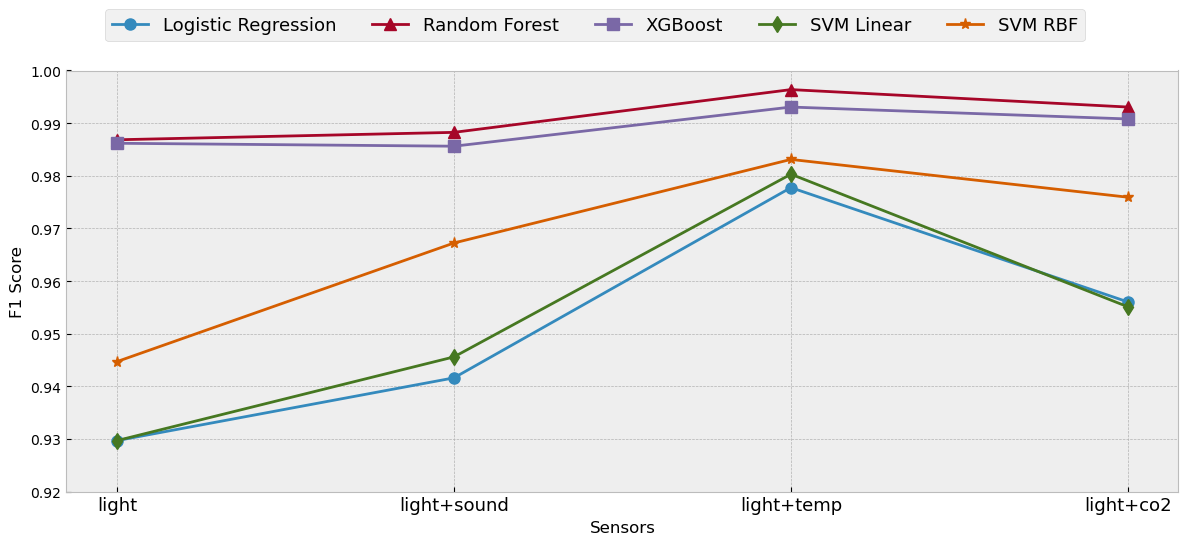

In [57]:
fig2, ax2 = plt.subplots(figsize=(12, 5))

marker = ['o', '^', 's', 'd', '*']
size = 8
linewidth = 2

ax2.plot(xticks, df_comb['logistic'], label='Logistic Regression', marker=marker[0], ms=size, lw=linewidth)
ax2.plot(xticks, df_comb['rf'], label='Random Forest', marker=marker[1], ms=size, lw=linewidth)
ax2.plot(xticks, df_comb['xgboost'], label='XGBoost', marker=marker[2], ms=size, lw=linewidth)
ax2.plot(xticks, df_comb['svm_linear'], label='SVM Linear', marker=marker[3], ms=size, lw=linewidth)
ax2.plot(xticks, df_comb['svm_rbf'], label='SVM RBF', marker=marker[4], ms=size, lw=linewidth)

ax2.set_xlabel('Sensors')
ax2.set_ylabel('F1 Score')
ax2.set_xticks(xticks, xticks,fontsize=13)
ax2.set_ylim(0.92, 1.0)

fig2.legend(loc='upper center', ncol=5, bbox_to_anchor=(0.5, 1.1), fontsize=13)

plt.tight_layout()
fig2.savefig('img/results_comb.png', dpi=300, bbox_inches='tight')